In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")

This notebook will check Amplitude of the best model per slit for a given mask vs. the [O II] flux measured by Jae's method and see if there is a similar trend or not. 

### Mask 1186

In [2]:
masknum = '1186'
maskname = 'COSMOS-1'

Data preprocessing

In [3]:
#read Jae's data; this is saved in results/JaeResults/union-catalog-results/
df_CNN = pd.read_csv("../data/JaeResults/union-catalog.csv")

#read in my data; both blue and red mask
df_Gauss_b = pd.read_csv("../results/Max_z_n_width/" + masknum + ".txt")
df_Gauss_r = pd.read_csv("../results/Max_z_n_width/" \
                         + str(int(masknum) + 1) + ".txt")

#ignore the last value 
df_Gauss_b = df_Gauss_b[:-1]
df_Gauss_r = df_Gauss_r[:-1]

#process Jae's data to only include the necessary mask 
df_CNN = df_CNN[df_CNN['mask_name'] == maskname]
df_CNN = df_CNN[1:] #clip first and last point to match Gaussian_Filter data length

#turn -999 to np.nan
replace_999 = {-999:np.nan}
df_CNN = df_CNN.replace(replace_999)
df_Gauss_b = df_Gauss_b.replace(replace_999)
df_Gauss_r = df_Gauss_r.replace(replace_999)

In [4]:
df_CNN.tail()

,Unnamed: 0,CONF,DEC,MASK_NUM,OII,OII_err,RA,bit_code,gmag,redz,rmag,zmag,mask_name
435,435.0,3.0,2.125968,2.0,8.116577,0.286172,149.731087,8.0,23.217658,0.8373,22.545479,21.796948,COSMOS-1
436,436.0,NaN,2.122726,2.0,0.000000,-1.000000,149.710408,4.0,21.457291,NaN,19.597485,18.513648,COSMOS-1
437,437.0,NaN,2.123648,2.0,0.000000,-1.000000,149.613543,208.0,22.827065,NaN,22.159316,20.592042,COSMOS-1
438,438.0,3.0,2.114244,2.0,11.319278,0.327417,149.733670,2000.0,22.661996,0.7509,22.029040,21.152637,COSMOS-1
439,439.0,2.0,2.116113,2.0,9.505800,0.251534,149.620169,984.0,23.489338,0.9739,23.119165,22.146569,COSMOS-1


In [5]:
df_Gauss_b.tail()

,Unnamed: 0,ra,dec,max_z,max_w,amp_max
153,154,149.731087,2.125968,0.836494,80.0,13.998770
154,155,149.710408,2.122726,NaN,NaN,NaN
155,156,149.613543,2.123648,NaN,NaN,NaN
156,157,149.733670,2.114244,0.750294,80.0,17.520608
157,158,149.620169,2.116113,NaN,NaN,NaN


In [6]:
df_Gauss_r.tail()

,Unnamed: 0,ra,dec,max_z,max_w,amp_max
153,154,149.731087,2.125968,1.466803,120.0,10.084553
154,155,149.710408,2.122726,NaN,NaN,NaN
155,156,149.613543,2.123648,0.883803,0.0,40.214989
156,157,149.733670,2.114244,1.282003,45.0,8.331302
157,158,149.620169,2.116113,0.973003,90.0,22.763103


First check amplitude blue vs amplitude red:

Text(0, 0.5, 'Amp red')

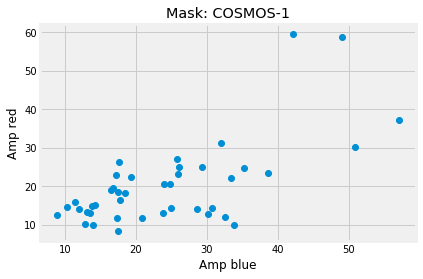

In [7]:
plt.plot(df_Gauss_b['amp_max'], df_Gauss_r['amp_max'], ls = "", marker = "o")
plt.title("Mask: " + maskname)
plt.xlabel("Amp blue")
plt.ylabel("Amp red")

This makes sense because most of the redmask amplitudes are wrong so we need to update most of the amps.

## Check amplitude vs [O II] flux trend

Blue mask

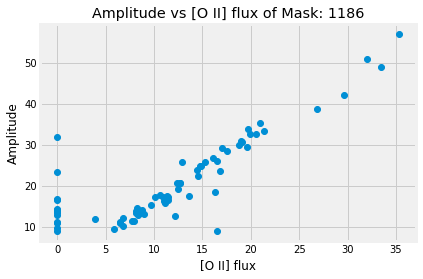

In [8]:
plt.plot(df_CNN['OII'], df_Gauss_b['amp_max'], ls = "", marker = "o")
plt.title("Amplitude vs [O II] flux of Mask: " + masknum)
plt.xlabel("[O II] flux")
plt.ylabel("Amplitude")
plt.savefig("Amp_vs_OII.png", dpi = 250, bbox_inches= 'tight')

This trend is consistent with what is expected -- amplitudes should trace the trend of fluxing.

Red mask

(0, 65)

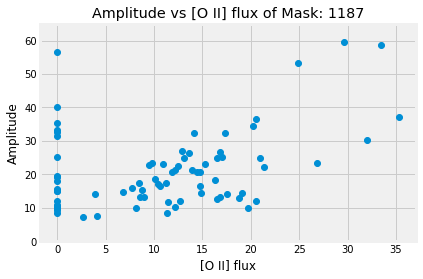

In [9]:
plt.plot(df_CNN['OII'], df_Gauss_r['amp_max'], ls = "", marker = "o")
plt.title("Amplitude vs [O II] flux of Mask: " + str(int(masknum) + 1))
plt.xlabel("[O II] flux")
plt.ylabel("Amplitude")
plt.ylim([0, 65])

Look at the explanation above.

## Now check if CNN method found any redshifts that Gaussian Filter method failed to find

In [10]:
#read in Gaussian filter results
df_Gauss = pd.read_excel("../results/Max_z_n_width/" + masknum + "+" +\
 str(int(masknum) + 1) + "_visual-inspected.xlsx")

In [11]:
#take average between blue and red mask and generate final redz
df_Gauss['z_final'] = df_Gauss[['z_b', 'z_r']].mean(axis = 1)

#clip last value of CNN
df_CNN = df_CNN[:-1]

In [12]:
df_Gauss.tail()

,Slit Num,z_b,vel_b,Confidence_b,Notes_b,z_r,vel_r,Confidence_r,Notes_r,z_final
152,153,0.890294,40.0,1.0,NaN,NaN,NaN,NaN,NaN,0.890294
153,154,0.836494,80.0,3.0,NaN,0.836460,120.0,3.0,w*o2,0.836477
154,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,156,NaN,NaN,NaN,NaN,0.883803,0.0,NaN,NaN,0.883803
156,157,0.750294,80.0,3.0,NaN,0.749737,45.0,3.0,w*hb,0.750016


In [13]:
#redshift arrays
jz = np.array(df_CNN['redz'])
tz = np.array(df_Gauss['z_final'])

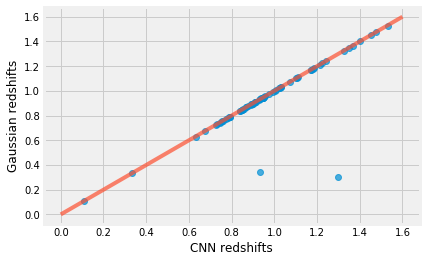

In [14]:
#plot comparison
x = np.arange(0, 1.7, .1)
alpha = 0.7
plt.plot(jz, tz, marker = "o", ls = "", alpha = alpha)
plt.plot(x, x, alpha = alpha)
plt.xlabel("CNN redshifts")
plt.ylabel("Gaussian redshifts")
fname = "../results/summary_statistics/CNN_vs_Gauss/" + maskname \
+ "-CNN_vs_Gauss_comparison.png"
plt.savefig(fname, dpi = 250, bbox_inches = 'tight')

In [15]:
#Show stats on how many redshifts Gaussian Filter method did not identify
idx = np.where(np.isnan(tz))
print("slits where CNN found redz but Gaussian Filter did not:")
print("Total number of slits: ", np.sum((np.isnan(jz[np.isnan(tz)]) == False)))
print("------------------------------------------------------")
print(df_CNN.iloc[idx].dropna())
print("------------------------------------------------------")

slits where CNN found redz but Gaussian Filter did not:
Total number of slits:  9
------------------------------------------------------
     Unnamed: 0  CONF       DEC  MASK_NUM        OII   OII_err          RA  \
288       288.0   3.0  2.335872       2.0   6.022069  0.239421  149.934395   
298       298.0   3.0  2.306910       2.0   6.367792  0.312719  149.816994   
299       299.0   3.0  2.302222       2.0  20.092841  0.520151  149.891162   
337       337.0   3.0  2.189960       2.0   1.599111  0.243899  149.858250   
353       353.0   1.0  2.133310       2.0   5.473972  0.254889  149.841567   
360       360.0   3.0  2.107576       2.0   2.683161  0.185770  149.858727   
387       387.0   3.0  2.279246       2.0   0.000000 -1.000000  149.709116   
416       416.0   3.0  2.193647       2.0   6.455759  0.382876  149.682100   
433       433.0   3.0  2.135751       2.0   6.004892  0.330992  149.632129   

     bit_code       gmag     redz       rmag       zmag mask_name  
288     152.0 

Among these, check how many meet the flux threshold of $8\times 10^{-17}$:

In [16]:
df_threshold = df_CNN.iloc[idx].dropna()
df_threshold = df_threshold[df_threshold['OII'] > 8]
print("Total number of slits meeting flux threshold: ", len(df_threshold))
print("------------------------------------------------------")
print(df_threshold)
print("------------------------------------------------------")

Total number of slits meeting flux threshold:  1
------------------------------------------------------
     Unnamed: 0  CONF       DEC  MASK_NUM        OII   OII_err          RA  \
299       299.0   3.0  2.302222       2.0  20.092841  0.520151  149.891162   

     bit_code       gmag   redz       rmag       zmag mask_name  
299    1928.0  23.354948  1.535  23.344564  22.816226  COSMOS-1  
------------------------------------------------------


In [21]:
2.535*3727/6563*5007


7207.962915587384

In [23]:
def datareader(maskname, dir_name = "../data/npz_files/"):
	"""Reads mask data for use by the other functions in this module
	Parameters
	----------
	maskname: name of the mask + '-' + grating number
	"""
	
	fname = maskname + '-' + 'spec1d.npz'
	data = np.load(dir_name + fname)
	
	return data

In [36]:
def wave_grid(data):
	"""Returns wavegrid based on header file from data"""
	
	crval1 = float(str(data['headers'][1]).split("CRVAL1")[1].\
				split("=")[1].split("/")[0]) #Starting value
	cdelt1 = float(str(data['headers'][1]).split("CDELT1")[1].\
				split("=")[1].split("/")[0]) #Pixel size
	
	collapsedSpectrum = data['data_ivar'][:, 0, :]
	
	wave_grid = crval1 + cdelt1 * np.arange(collapsedSpectrum[1].shape[0])
	wave_grid *= 10 #Convert wave_grid to Angstrom from nm
	crval1 *= 10
	
	return crval1, wave_grid

In [39]:
data = datareader('1187')
_, wg = wave_grid(data)

In [45]:
2.2*3727

8199.400000000001

(8100, 8300)

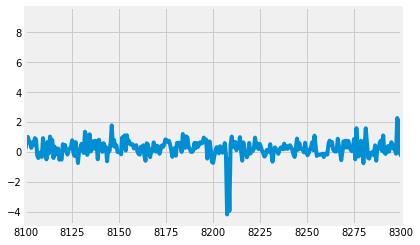

In [49]:
image = data['data_ivar']
image = image[18]
plt.plot(wg, image[0])
plt.xlim([8100, 8300])

## Now check which slits I found redz for but CNN did not

In [17]:
#Show stats on how many redshifts Gaussian Filter method did not identify
idx = np.where(np.isnan(jz))
print("slits where CNN found redz but Gaussian Filter did not:")
print("Total number of slits: ", np.sum((np.isnan(tz[np.isnan(jz)]) == False)))
print("------------------------------------------------------")
print(df_Gauss.iloc[idx].dropna(subset = ['z_final']))
print("------------------------------------------------------")

slits where CNN found redz but Gaussian Filter did not:
Total number of slits:  26
------------------------------------------------------
     Slit Num       z_b  vel_b  Confidence_b Notes_b       z_r  vel_r  \
0           1  1.004494   85.0           3.0     NaN       NaN    NaN   
3           4       NaN    NaN           NaN     NaN  1.455603   65.0   
5           6       NaN    NaN           NaN     NaN  1.170803   55.0   
11         12       NaN    NaN           NaN     NaN  0.994403   80.0   
13         14       NaN    NaN           NaN     NaN  1.239003   55.0   
14         15       NaN    NaN           NaN     NaN  1.496603   75.0   
19         20       NaN    NaN           NaN     NaN  1.148203  110.0   
21         22       NaN    NaN           NaN     NaN  0.993403  125.0   
29         30  1.094494   55.0           1.0     NaN       NaN    NaN   
38         39  0.885094   65.0           3.0     NaN       NaN    NaN   
47         48       NaN    NaN           NaN     NaN  1.178